<a href="https://colab.research.google.com/github/pmontman/tmp_choicemodels/blob/main/nb/tutorials/solutions/WK_02b_sol_tut_likeli.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tutorial 2b

In this tutorial, we will see:

* Some exercises to solidify the concept around 'likelihood' or 'likelihood function' for a candidate model (specific values of parameters of the model), given some data.


---
---

# 2) Intuition on likelihood


Let's consider the following scenario: We are responsible for the sales of umbrellas in a large department store, we would like to understand a bit more about the process.
We have a sample of the clients that come into the store, knowing whether they bought an umbrella or not, a simple binary choice.

Our first approximation consists of assuming that all clients are equivalent, so every time a client enters our store, they choose whether to buy an umbrella or not following some random variable (but the probability distribution for that random variable is the same for all clients). For example, the choose according to a coin toss, each client might get a different outcome, but they all choose according to a coin toss.

## 2.1) What do you think is the probability distribution that governs the decision-making process under our initial assumptions?
 A random choice between two alternatives, there is a 'famous' probability distribution that is used to model experiments with 2 possible outcomes...



The Bernouilli distribution

---

The parameter of that distribution, this unique probability, lets call it $p_{\Omega}$ is the parameter in our simple model.

Our data for the clients coming to our store is [in this file](https://raw.githubusercontent.com/pmontman/pub-choicemodels/main/data/umbrella_month.csv), lets take a look at it.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



umbrella_df = pd.read_csv("https://raw.githubusercontent.com/pmontman/pub-choicemodels/main/data/umbrella_month.csv")

umbrella_df.head(5)

,buy_umbr,month,client_id
0,True,12,1
1,False,10,2
2,False,6,3
3,True,5,4
4,True,12,5


the variable **buy_umbr** indicates whether the client bought the umbrella, **month** is the month when the client visited the store (it is some 'side information' that we will use later to come up with a better model).



## 2.2) Compute the likehood function for a range of values of $p_{\Omega}$ and plot them.
*For each value of $p_{\Omega}$ compute the likelihood function: the probability of having ovserved the data if $p_{\Omega}$ was the value of the Bernouilli that generates the experimental data.*
*Because there are many repetitions of the experiment, the likelihood for all is the joint probability. We can assume that the observations are independent therefore the joint probability is calculated by the product of all individual ones.* *The product of many small number will produced 'numerical problems' in the computations, rounding errors because of the limitations. A way to mitigate the issue is to transform the product into a sum of larger numbers by taking the logarithm. We can use the logarithm to do maximum likelihood because the logarithm does not change which input value produces the maximum.*

HINT: You can transform the product in the likelhood function to a sum by taking the logarithm. $\log(a\times b \times c) = log(a) + log(b) + log(c)$. This is commonly done when calculating likelihoods, because computing many products of small numbers produces numerical problems (very small numbers are difficult to handle by computers). This technique is so commo that we often tlak about log likelihoods.

The best value for p_omega according to likelihood is: 0.5445454545454546


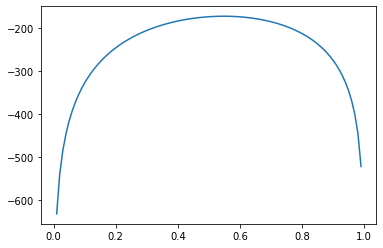

In [2]:
def likeli_uniprob(p_omega):
  return np.sum(np.log( (p_omega**umbrella_df['buy_umbr']) * 
                ( (1- p_omega)**(1-umbrella_df['buy_umbr'])) ) )

p_omega_range = np.linspace(0.01, 0.99, 100)
likelihoods_for_p_omega = [likeli_uniprob(po) for po in p_omega_range]

plt.plot(p_omega_range, likelihoods_for_p_omega)
print('The best value for p_omega according to likelihood is:', p_omega_range[np.argmax(likelihoods_for_p_omega)])

We now go for a more advanced model. We have data about the month that the clients visit our store, and we think with that the probability of buying an umbrella can be approximated more accurately if we consider the month in our model. The probability therefore is not unique, it varies from month to month.

#2.3) Can you think of a function that could express the relationship between month and the probability of buying an umbrella?
HINT: You can plot the data, and think of functions that create cyclical patterns. The answer does not have to be perfect! There are many different possibilities, the main point is using the information about the month to now produce a probability of buying an umbrella for each client, instead of the same for all clients.

*Please write some answer here*


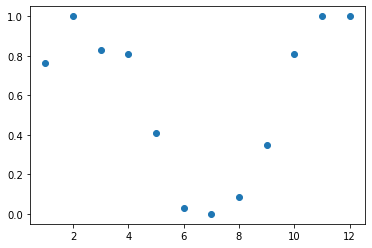

In [3]:
#lets plot the estimation of probabilities per month
bymonth = umbrella_df.groupby('month').mean()
plt.scatter(bymonth.index, bymonth['buy_umbr'])


**Looks like a sinusoidal, $sin(x)$, representing yearly cycles, but we have to transform it into probabilities 0-1. $\frac{sin(x) +1}{2}$ keeps the output between 0 and 1, but remember that there are many possibilities that you can think of!**


To better tune the solution, we introduce a parameter in our model, we will first multiplying the number of the month by this parameter and then transform this through the function that creates cycles.

*The idea here is that when we have a function that produces cycles, we then can adjust the length of the cycles by adding a parameter to the model. We can find the value of this parameter by using maximum likelihood. This should make clear the idea that maximum likelihood is a general technique to find good values for the parameters in our model, when we know the shape of the underlying probability distribution that generates the data. In the case of choice model, this is a well known distribution.*

##2.4) Plot the likelihood function of that parameter for a range of values. What are some good values for that parameter? Compare the likelihoods of this model with the initial one, which model do you think  is better?

The max likelihood for the unique prob model is: -172.13903633220917 
 The max likelihood for the sinusoidal model is: -88.53160212617345


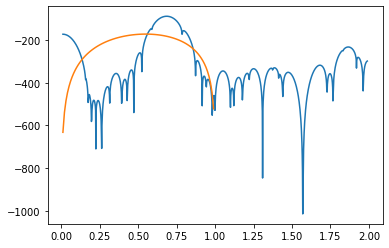

In [4]:
def cycle_transform(param):
  return (np.sin(umbrella_df['month']*param) + 1)/2

def likeli_sinusoid(param):
  p_sin = cycle_transform(param)
  return np.sum(np.log( (p_sin**umbrella_df['buy_umbr']) * 
                ( (1- p_sin)**(1-umbrella_df['buy_umbr'])) ) )


cycle_transform(0.5)
param_range = np.linspace(0.01, 1.99, 1100)
likelihoods_sinusoid = [likeli_sinusoid(param) for param in param_range]

plt.plot(param_range, likelihoods_sinusoid)
plt.plot(p_omega_range, likelihoods_for_p_omega)
print('The max likelihood for the unique prob model is:',
      np.max(likelihoods_for_p_omega), '\n',
      'The max likelihood for the sinusoidal model is:', np.max(likelihoods_sinusoid))

#print('The best value for p_omega according to likelihood is:', p_omega_range[np.argmax(likelihoods_for_p_omega)])